In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#Training & Testing Spliting
training_set = train_datagen.flow_from_directory(r'dataset/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')


Found 1608 images belonging to 8 classes.


In [4]:
test_set = train_datagen.flow_from_directory(r'dataset/validation',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 483 images belonging to 8 classes.


In [5]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [6]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [7]:
x = inception_v3.output
x = Flatten()(x)

x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=8, activation='softmax')(x)
model = Model(inception_v3.input, output)

#model.summary()

In [8]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [9]:
histry = model.fit(training_set,
                            validation_data=test_set,
                            epochs=100,
                            steps_per_epoch=len(training_set),
                            validation_steps=len(test_set),
                            )

C:\Users\rajes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.1522 - loss: 10.8401 - val_accuracy: 0.2671 - val_loss: 1.9316
Epoch 2/100


C:\Users\rajes\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2259 - loss: 2.0000 - val_accuracy: 0.3892 - val_loss: 1.6371
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3012 - loss: 1.8620 - val_accuracy: 0.3892 - val_loss: 1.6301
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3417 - loss: 1.7543 - val_accuracy: 0.4700 - val_loss: 1.4171
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3790 - loss: 1.6181 - val_accuracy: 0.5259 - val_loss: 1.3406
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━

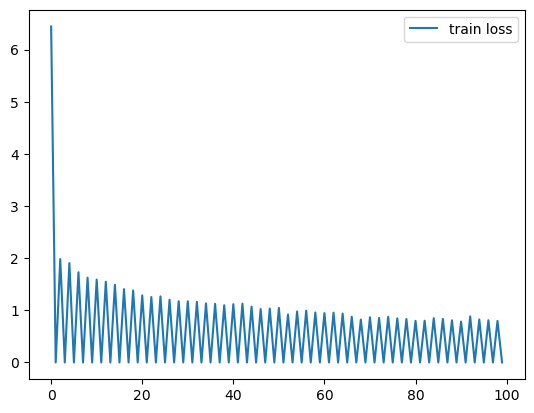

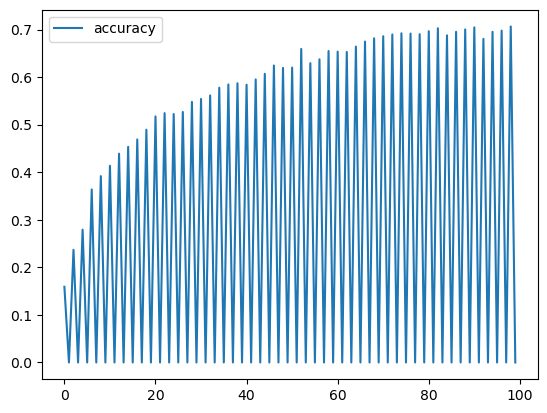

In [10]:
plt.plot(histry.history['loss'], label='train loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(histry.history['accuracy'], label='accuracy')
plt.legend()
plt.show()


model.save('model1.h5')

In [ ]:
import cv2
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model('model2.h5')



cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

class_labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness', 'surprise']

def preprocess_frame(face):
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  
    face = cv2.resize(face, (224, 224))  
    face = np.expand_dims(face, axis=-1)  
    face = np.repeat(face, 3, axis=-1)  
    face = face / 255.0  
    face = np.expand_dims(face, axis=0)  
    return face

def predict_emotion(face):
    img_array = preprocess_frame(face)
    prediction = model.predict(img_array)  
    predicted_class_index = np.argmax(prediction, axis=1)[0]  
    
    predicted_class_label = class_labels[predicted_class_index]
    
    confidence = np.max(prediction)  
    return predicted_class_label, confidence

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    gray_frame_3channel = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR)
    
    faces = face_cascade.detectMultiScale(gray_frame_3channel, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Crop the face region
        face = frame[y:y + h, x:x + w]
        
        # Predict the emotion from the cropped face
        emotion, confidence = predict_emotion(face)
        print(emotion)

        label = f"{emotion} ({confidence*100:.2f}%)"
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
neutrality
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
happiness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6